In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("국민청원_키워드_뉴스_0907.csv",encoding = 'cp949')
# df.Date = pd.to_datetime(df.Date)

In [26]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류1    164 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [6]:
df.head()

,news Date,news from,news title,keyword,best keyword
0,2017-08-27,경향신문,"[화학물질, 안전망이 없다①]생리대 유해물질, 주원인도 모르면서...식약처 ""VOC...","생리대,유해,물질,주원인,식약처,VOC,전수조사,눈가리기,릴리안,생리대,촉발,화학,...","생리대,식약처,voc,역학조사,회용,화학물질,부작용,환경부,릴리안,김만구,최경호,고..."
1,2017-08-27,경향신문,"[화학물질, 안전망이 없다①]생리대 부작용, 주원인도 모르면서 식약처 “VOC만 전...","생리대,부작용,주원인,식약처,VOC,전수조사,역학조사,릴리안,생리대,촉발,화학,물질...","생리대,식약처,voc,역학조사,부작용,화학물질,전문가,환경부,환경성,김만구,릴리안,..."
2,2017-08-30,한겨레,청와대 누리집에 여성가족부 장관 해임 청원이 뜬 이유?,"청와대,누리집,여성,가족부,장관,해임,청원,청와대,누리집,국민,청원,게시판,장관,정...","청원,정현백,청와대,탁현민,게시판,청원자,누리집,조승현,누리꾼,임종석,가족부,문재인..."
3,2017-08-31,경향신문,청와대 게시판에 ‘탁현민 경질 건의‘ 여가부 장관 해임 청원 올라와,"청와대,게시판,건의,탁현민,경질,여가부,장관,해임,청원,청와대,홈페이지,국민,청원,...","행정관,탁현민,청원,청와대,게시판,임종석,정현백,여가부,청원자,문재인,홈페이지,인사..."
4,2017-09-02,한겨레,문재인 정부 ‘청와대 국민청원’ 베스트 제안은?,"문재인,정부,청와대,국민,청원,베스트,제안,청와대,국민,청원,제안,게시판,청원,스텔...","청원,청와대,청원인,문재인,장애인,게시판,국민청원,기간제,정규직,독박,대한민국"


In [8]:
df.loc[df["news Date"]=="2018-05-03"]

,news Date,news from,news title,keyword,best keyword
1081,2018-05-03,동아일보,[퇴근길 사회] 불쑥 다가오는 불편한 손길 “애(kids)티켓 지켜주세요”,"불편,손길,kids,티켓,아이,지하철,기분,시선,애들,인사,할머니,아이들,자리,양보...","화장실,청와대,영유아,kids,결정권,청원,남자교사,공연장,가톨릭대,추행죄,정윤경,..."
1082,2018-05-03,동아일보,"‘광주폭행 엄벌’ 청와대국민청원, 5시간만에 7만→13만 ‘분노 폭발’","광주,폭행,엄벌,청와대국민청원,5시간,7만,분노,폭발,광주광역시,발생,사건,집단,폭...","청원,광주,청와대,가해자,피해자,7명,온라인,피의자,조직폭력배,7만,검색어,실시간,..."
1083,2018-05-03,동아일보,택시 탑승 시비로 벌어진 잔혹한 폭행 3명 구속-2명 영장,"시비,택시,탑승,잔혹,폭행,3명,구속,2명,영장,지난달,수완동,광주,광산구,술집,도...","술집,광주,청와대,오른쪽,나뭇가지,청원,풀밭,2명,3명,광산구,친구들,폭력배,네트워..."
1084,2018-05-03,동아일보,“김성태 단식 CCTV로 감시해야” 청와대 국민청원 등장에 洪 ‘발끈’,"CCTV,김성태,단식,감시,등장,청와대,국민,청원,대표,자유,한국당,홍준표,원내대표...","김성태,청원,청와대,단식투쟁,관찰카메라,원내대표,홍준표,홈페이지,국민들,한국당,청원..."
1085,2018-05-03,한겨레,"경찰 “광주 집단 폭행, 조폭여부 등 따져 살인미수도 검토”","경찰,광주,집단,폭행,조폭여부,살인미수,검토,광주,시비,택시,승차,집단,폭행,남성,...","정씨,광주,피해자,오른쪽,광산경찰서,가해자들,청와대,청원,3명,게시판,가해자,살인미..."
1086,2018-05-03,KBS,[뉴스해설] 대입 제도 혼란 최소화해야,"대입,제도,혼란,최소,김석호,해설,위원,학년도,대입,제도,개편,공론화,시작,국민,여...","공론화,학생부,학년도,개편안,학부모,청와대,수험생,교육부,청원,김석호,공감대,위원회..."
1087,2018-05-03,중앙일보,“내 가족도 당할 수 있다” 광주 ‘집단폭행’ 청원 순식간 9만명,"가족,광주,집단,폭행,9만,청원,순식,광주,발생,가해자들,집단,폭행,사건,가해자,엄...","청원,광주,피해자,청와대,가해자들,9만,가해자,게시자,광산구,4명,3명,폭력행위,풀..."
1088,2018-05-03,중앙일보,“‘딸 성폭행 사진 게재 범죄자’ 처벌해달라” 靑청원 20만명 넘겨,"범죄자,성폭행,사진,게재,처벌,청원,20만,불법,음란,사이트,상습,성폭행,사진,게재...","청원,청와대,성폭행,20만,아이들,청원게시자,어른들,범죄자,성범죄자,경찰관,수사대,..."
1089,2018-05-03,SBS,"[오!클릭] 대한민국 여권 색깔, '남색'으로 바뀐다","색깔,대한민국,남색,클릭,번째,남색,대한민국,32년,예정,일반인,사용,여권,진녹색,...","대한민국,차세대,오른쪽,그동안,빅픽처,청원,외교부,관광부,국민청원,이슬람,누리꾼,가..."
1090,2018-05-03,SBS,오늘의 주요뉴스,"주요뉴스,1.,출전,대표팀,남북,여자,탁구,대표,27년,남북,단일팀,구성,남북,8강...","중국,청와대,한진,광주,김정은,미국인,16만,단일팀,북미,kal,조현민,게시판,조현..."


In [34]:
df_0503_f = df.loc[df["news Date"]<"2018-05-03"]
df_0503_f = df_0503_f.loc[df_0503_f["news Date"]>="2018-04-03",["news Date","best keyword"]]
df_0503_f

,news Date,best keyword
838,2018-04-03,"장자연,청와대,기업인,과거사위원회,낙동강,류란,관계자,법무부,언론사,용산,과거사,민..."
839,2018-04-03,"과거사위,관계자,장자연,조선일보,법무부,청원,언론사,서울"
840,2018-04-03,"김생민,성추행,청와대,청원,연예가중계,국민청원,방송인,운영자,kbs,홈페이지,팬카페..."
841,2018-04-03,"기무사,증거물,청원,용의자,맹호부대,의문사,청와대,게시판,유가족,재조사,과학적,재수..."
842,2018-04-03,"교육부,서울,학년도,고2,청와대,청원,학부모,김재철,한국교총,주석훈,간담회,입시계획..."
...,...,...
1076,2018-05-01,"해외출장,권익위,공무원,피감기관,지방자치단체,전수조사,외유성,피감,청와대,부위원장,..."
1077,2018-05-01,"어벤져스,어벤져스3,마블,독과점,극장가,매출액,1위,한국,히어,신기록,박스오피스,2위"
1078,2018-05-02,"평양냉면,옥류관,1만,물냉면,서울,평양,만큼,청와대,정상회담,황교익,김정은,6천,청..."
1079,2018-05-02,"겉면,그동안,차세대,외교부,청와대,공모전,관계자,대한민국,청원,미국,이슬람,김수정,..."


In [36]:
df_0503_b = df.loc[df["news Date"]>"2018-05-03"]
df_0503_b = df_0503_b.loc[df_0503_b["news Date"]<="2018-06-02",["news Date","best keyword"]]
df_0503_b

,news Date,best keyword
1092,2018-05-04,"가해자,피해자,청와대,광주,청원,20만,가해자들,장인수,한복판,여럿,안면골절,구속수..."
1093,2018-05-04,"가해자,청원,가해자들,청와대,피해자,최혜진,누리꾼,음성변조,풀숲,광주,일파만파,수차..."
1094,2018-05-04,"가해자,피해자,20만,광주,청와대,가해자들,장인수,청원,한복판,국민청원,여럿,안면골..."
1095,2018-05-04,"미국인,미군,국립공원,청와대,가해자,대한항공,관람료,북미,김경수,문화재관람료,문화재..."
1096,2018-05-04,"가해자,피해자,청와대,광주,청원,20만,가해자들,장인수,한복판,여럿,안면골절,구속수..."
...,...,...
1249,2018-05-18,"양예원,청원,성추행,청와대,게시판,국민청원,합정,유튜버,5만,5배,성범죄,피해자,반..."
1250,2018-05-18,"청원,성추행,인스타그램,유튜버,휴머니즘,촬영장,사진들,사람들,박수진,청와대,일자리,..."
1251,2018-05-18,"청원,이소윤,영향력,성추행,양예원,유튜버,합정,누리꾼,ㅠㅠ,사람들,국민청원,공개적,..."
1252,2018-05-18,"전두환,광주,청원,기념비,게시판,전남,광주전남,홈페이지,연희동,청와대,경찰인력,시민..."


## 워드 클라우드 생성

In [27]:
def word_cloud(text):
    
    ### 세종사전 실행
    from konlpy.tag import Twitter
    from collections import Counter
    from wordcloud import WordCloud
    twitter = Twitter()
    
    ### 단어리스트 만들기
    word_list= text.to_list()
    ### 형태소 분리
    sentences_tag = []
    for i in word_list:
        k = i.split(",")
        for n in k:
            sentences_tag.append(n)
        
        
#     print(sentences_tag)
    #for sentence in word_list:
    #    morph = twitter.pos(sentence)
    #    sentences_tag.append(morph)
    
    ### 명사만 추출
    #noun_list = []
    #for sentence in sentences_tag:
    #    for word, tag in sentence:
    #        if tag in ['Noun']:
    #            noun_list.append(word)
                
    ### 두 단어 이상만 추출
    #len(noun_list)

    #noun_list = [n for n in noun_list if len(n) > 1]
    #noun_list[:100]
    
    ### 불용어 제거
    ##stopwords = ["청원", '처벌', '대한', '요청', '반대', '국민', '사건', '조사', '촉구', '요구', '불법', '대한민국', '개선', '관련'
    ##          ,'한국']


    ##noun_list = [i for i in noun_list if i not in stopwords]
    #print(word_list)
    ### 단어 카운트
    counts = Counter(sentences_tag)
    tags = counts.most_common(40)

    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    
    df_tag = pd.DataFrame(data = tags)
    display(df_tag[:20].T)
    display(df_tag[20:].T)
    print()

    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,게시판,국민청원,관계자,20만,대한항공,삼성증권,갑질,위원회,공매도,조현민,서울,홈페이지,다산,실버택배,증권사,김기식,투자자,국토부
1,194,182,70,67,48,44,42,39,36,33,31,31,29,26,26,24,23,23,22,22


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,입주민,국회의원,한국,직원들,문재인,위원장,사람들,온라인,조현아,한진그룹,일자리,피해자,더불어민주당,미국,청원자,국민,우리나라,전수조사,청원인,경기도
1,21,20,19,19,18,17,16,15,15,14,14,13,13,13,13,13,13,13,13,13


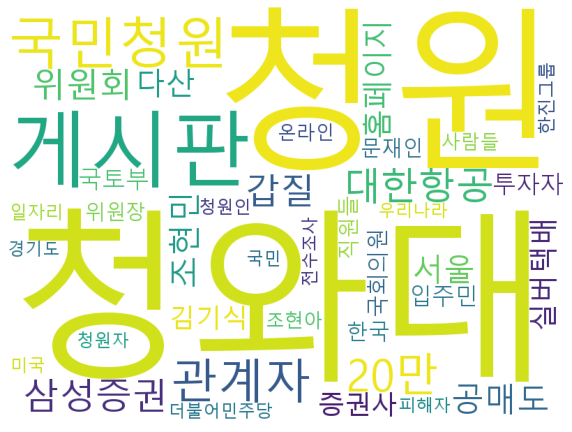

In [28]:
# 243건 (30일 전, 4월 3일)
word_cloud(df_0503_f["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,게시판,국민청원,피해자,가해자,관계자,서울,페이스북,20만,비서관,광주,홍대,양예원,성추행,홈페이지,만큼,sns,유튜버,국민
1,268,238,99,84,71,43,40,40,35,33,28,25,24,24,24,23,23,22,22,21


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,한국당,성폭력,정혜승,미국,한국,온라인,대한민국,피의자,사람들,분들,성범죄,누리꾼,이재용,문재인,전두환,대법원,사법부,국회의원,5명,법원행정처
1,21,21,20,20,20,18,17,17,17,17,17,16,16,16,16,15,15,15,14,14


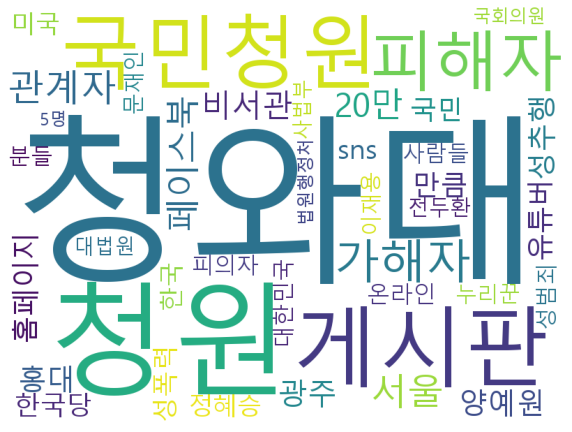

In [29]:
# 293건 (30일 후, ~6월 2일)
word_cloud(df_0503_b["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,국민청원,게시판,20만,다산,실버택배,입주민,국토부,대한항공,국회의원,홈페이지,위원회,일자리,경기도,김기식,서울,관계자,위원장,갑질
1,91,82,35,28,26,25,23,20,20,17,15,15,13,13,13,11,11,11,11,10


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,택배회사,남양주시,택배사,전수조사,주민들,삼성증권,중국,지자체,국토교통부,사람들,한진그룹,조현민,노인들,미세먼지,공매도,개헌안,피감,비서관,국민,미국
1,10,10,10,9,9,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7


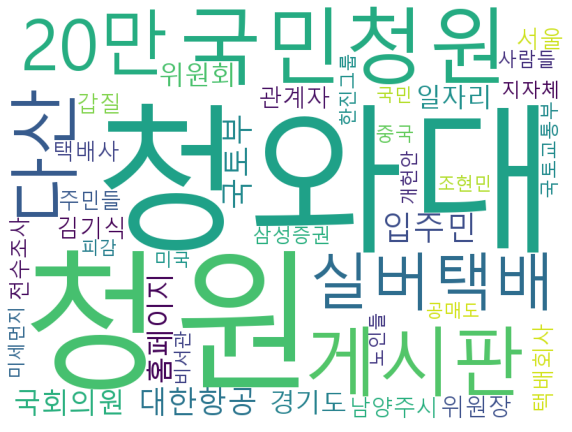

In [32]:
#116 건 (15일 전 4월 18일 ~)
word_cloud(df_0503_f["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,게시판,국민청원,피해자,관계자,가해자,20만,광주,홈페이지,서울,이재용,비서관,sns,만큼,홍대,가해자들,누리꾼,법원행정처,사법부
1,150,133,60,49,48,31,30,25,23,19,16,16,15,14,14,14,13,13,13,13


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,서울고법,정혜승,경찰관,대법원,행정처,사람들,성폭력,유튜버,나뭇가지,3명,대한민국,항소심,페이스북,홍익대,성범죄,양예원,성추행,폭행,피의자,부회장
1,13,13,12,12,12,12,12,12,11,11,11,11,11,11,11,11,11,10,10,10


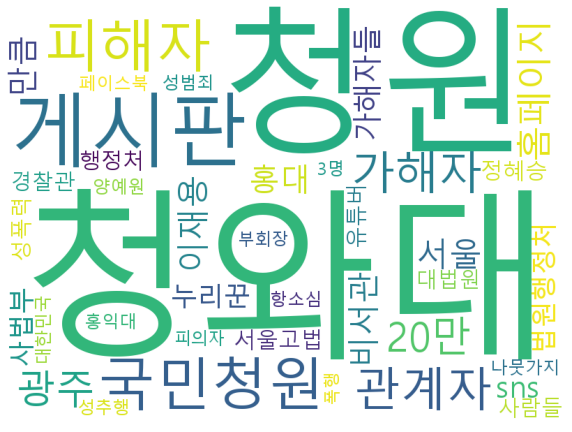

In [37]:
#162 건 (15일 후 5월 4일 ~ 5월 18일)
word_cloud(df_0503_b["best keyword"])

In [42]:
df_0318_f = df.loc[df["news Date"]<"2020-03-18"]
df_0318_f = df_0318_f.loc[df_0318_f["news Date"]>="2020-03-03",["news Date","best keyword"]]
df_0318_f

,news Date,best keyword
5928,2020-03-03,"부총리,소상공인,코로나,기본소득,홍남기,실직자,민생당,코로,박주현,무상공급,더불어민..."
5929,2020-03-03,"영업점,코로나19,서울,직원들,코로나,중국,청와대,재택근무,불안감,국민청원,은행원,..."
5930,2020-03-03,"청원자,홍남기,청와대,부총리,청원,의약품,경북,dur,판매처,7만,주민등록번호별,게..."
5931,2020-03-03,"의약품,id,클리앙,우체국,네이버,청원,e글중심,번호표,편의점,청와대,dur,동사무..."
5932,2020-03-03,"청원,청와대,네이버,음모론,중국,심서현,투명성,진영,드루킹,문재인,100만"
...,...,...
6009,2020-03-16,"교육부,코로나19,청원,청와대,확진자,교육감,권영진,조희연,관계자,코로나바이러스,학..."
6010,2020-03-17,"서울,3주,교육부,학원들,청와대,청원,학생들,강남,관계자,유은혜,부총리,휴원율,송인..."
6011,2020-03-17,"청원,서울,청원자,휴원율,유은혜,자영업자,교습소,청와대,개학일,조희연,소상공인,아이..."
6012,2020-03-17,"청원,청와대,문재인,관계자,분들,홈페이지,감염증,전문가,코로나바이러스,코로나19,질..."


In [43]:
df_0318_b = df.loc[df["news Date"]>"2020-03-18"]
df_0318_b = df_0318_b.loc[df_0318_b["news Date"]<="2020-04-02",["news Date","best keyword"]]
df_0318_b

,news Date,best keyword
6020,2020-03-19,"텔레그램,피해자,게시판,청와대,용의자,원정숙,서울중앙지법,성문화,취재진,경찰청,12..."
6021,2020-03-19,"텔레그램,피해자,조씨,미성년자,촬영물,성착취,청원,청와대,게시판,가해자,음란물,대화..."
6022,2020-03-19,"미래한국당,민주당,코로나19,황교안,국회의원,미래통합당,한국당,청원,청와대,박영회,..."
6023,2020-03-19,"텔레그램,조씨,미성년자,피의자,성착취,촬영물,청원,게시판,청와대,가해자,대화방,n번..."
6024,2020-03-19,"조씨,텔레그램,피의자,성착취,박사방,미성년자,청원,청와대,게시판,유치장,피해자,영장..."
...,...,...
6293,2020-04-02,"운전자,청원,무면허,촉법소년,10대,서울,sns,게시물,가해자,소년원,누리꾼,청와대..."
6294,2020-04-02,"김재중,코로나19,만우절,청와대,청원,사망자,게시판,연예톡톡,톡톡,소속사,온라인,경..."
6295,2020-04-02,"텔레그램,n번방,온라인,대학생,가해자,20대,행정관,강남역,오프라인,피해자,한양대,..."
6296,2020-04-02,"민식이법,스쿨존,민식이,개정안,운전자,청원,민식,특가법,가중처벌,고의성,충남,문재인..."


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,코로나19,관계자,게시판,서울,코로나,교육부,코로나바이러스,확진자,문재인,중국,국민청원,대구,학부모,온라인,가능성,한국,학생들,부총리
1,68,54,48,22,21,19,17,17,16,15,14,13,13,13,13,12,10,10,10,9


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,기본소득,2주,감염증,전문가,등록금,중국인,소상공인,이재명,이재웅,신천지,학부모들,유치원,민주당,청원자,지자체,재난기본소득,황교안,쏘카,경북,사람들
1,9,9,8,8,8,8,7,7,7,7,7,7,7,6,6,6,6,5,5,5


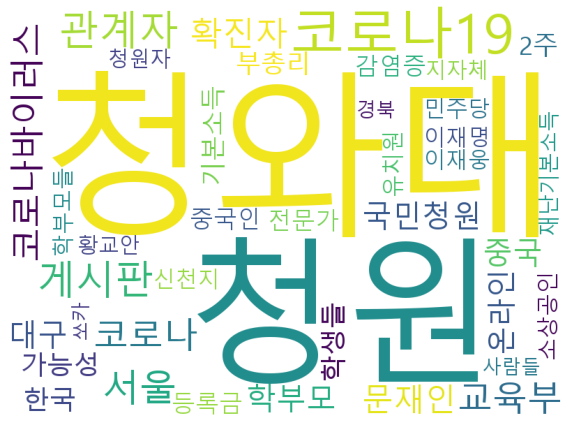

In [46]:
# 199건 (30일 전, 02-16 ~ 03 ~ 18)
word_cloud(df_0318_f["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,텔레그램,피해자,게시판,n번방,국민청원,박사방,코로나19,성범죄,가해자,성폭력,운영자,성착취,피의자,미성년자,신상공개,조주빈,조씨,용의자
1,301,282,147,116,99,98,93,92,87,80,79,75,72,66,62,60,57,52,51,46


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,서울,대화방,위원회,관계자,포토라인,가해자들,코로나,성폭행,온라인,음란물,가입자,청원인,한국,중학교,경찰청,여성들,서울중앙지법,학생들,성착취물,인천
1,45,42,38,35,35,35,34,34,33,30,30,29,28,27,26,26,25,24,24,24


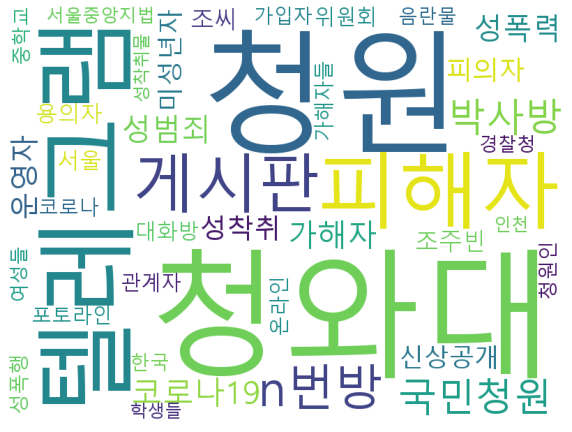

In [41]:
# 373건 (30일 후, ~2020-04-17)
word_cloud(df_0318_b["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,코로나19,관계자,게시판,서울,코로나,교육부,코로나바이러스,확진자,문재인,중국,국민청원,대구,학부모,온라인,가능성,한국,학생들,부총리
1,68,54,48,22,21,19,17,17,16,15,14,13,13,13,13,12,10,10,10,9


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,기본소득,2주,감염증,전문가,등록금,중국인,소상공인,이재명,이재웅,신천지,학부모들,유치원,민주당,청원자,지자체,재난기본소득,황교안,쏘카,경북,사람들
1,9,9,8,8,8,8,7,7,7,7,7,7,7,6,6,6,6,5,5,5


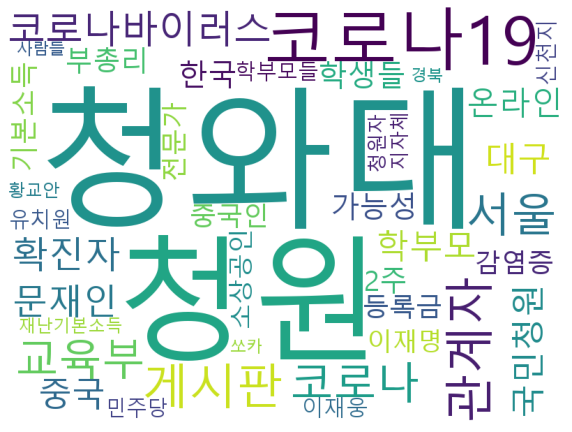

In [50]:
#86 건 (15일 전, 03-03 ~)
word_cloud(df_0318_f["best keyword"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,청와대,청원,텔레그램,피해자,n번방,박사방,국민청원,성범죄,운영자,게시판,성착취,가해자,성폭력,코로나19,신상공개,미성년자,조주빈,조씨,피의자,용의자
1,221,215,140,96,91,90,77,74,71,69,62,60,60,56,56,50,49,48,47,45


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,대화방,포토라인,위원회,음란물,서울,가입자,여성들,경찰청,코로나,온라인,서울중앙지법,착취물,가해자들,청원인,성착취물,20만,촬영물,사람들,미국,확진자
1,42,34,31,29,27,27,26,25,25,24,23,23,22,22,22,22,21,21,21,20


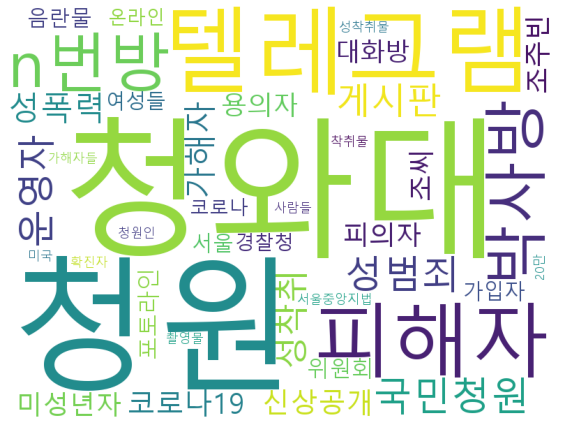

In [49]:
#278건 (15일 후 ~ 04-02)
word_cloud(df_0318_b["best keyword"])